In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.style.use('ggplot')

In [3]:
data = pd.read_csv('data/Hotel_Reviews.csv')

In [4]:
data.shape

(515738, 17)

In [5]:
indexes = np.random.choice(np.arange(len(data)), size=20000, replace=False)

In [6]:
data[:5]

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [79]:
data_sample = data.iloc[indexes]

In [31]:
def categorical_encoder_decoder(feature):
    names = set(feature)
    counters = dict(((name, 0) for name in names))
    for name in feature:
        counters[name] += 1
    pairs = [(i, name) for name, i in counters.items()]
    sorted_pairs = sorted(pairs)
    encode_dict = dict(((name, i) for i, (_, name) in enumerate(sorted_pairs)))
    decode_dict = dict(((i, name) for i, (_, name) in enumerate(sorted_pairs)))
    return encode_dict, decode_dict, sorted_pairs

### Распределние отзывов по странам

In [32]:
nat_enc_dict, nat_dec_dict, nat_sp = categorical_encoder_decoder(data_sample.Reviewer_Nationality)

In [33]:
nat_enc_feature = np.array([nat_enc_dict[x] for x in data_sample.Reviewer_Nationality])

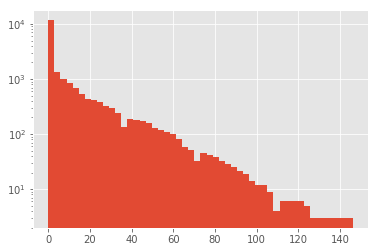

In [34]:
plt.hist(nat_enc_feature.max() - nat_enc_feature, bins=50, log=True);

In [40]:
pd.DataFrame(nat_sp[:5])

,0,1
0,1,Andorra
1,1,Antigua Barbuda
2,1,Benin
3,1,Botswana
4,1,Cambodia


In [38]:
pd.DataFrame(nat_sp[-5:])

,0,1
0,413,United Arab Emirates
1,591,Ireland
2,792,Australia
3,1382,United States of America
4,9498,United Kingdom


### Посмотрим на распределение оценок для каждой страны

In [46]:
nat_means = []
names = []
for name in set(data_sample.Reviewer_Nationality):
    names.append(name)
    mask = data_sample.Reviewer_Nationality == name
    nat_means.append(data_sample.Reviewer_Score[mask].mean())

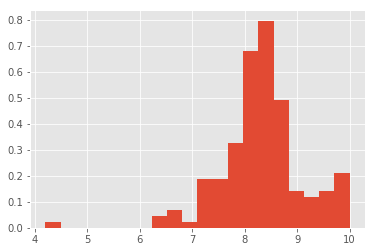

In [47]:
plt.hist(nat_means, bins=20, density=True);

In [57]:
res = []
for mean, name in zip(nat_means, names):
    if mean < 7:
        res.append((name, mean, nat_sp[nat_enc_dict[name]][0]))
pd.DataFrame(res, columns=['country', 'mean_review', 'count'])

,country,mean_review,count
0,Zambia,6.300,1
1,Cambodia,6.300,1
2,Syria,6.700,1
3,Algeria,6.875,8
4,Macau,4.200,1
5,St Maarten,6.700,2
6,Armenia,6.800,7


In [58]:
res = []
for mean, name in zip(nat_means, names):
    if mean >  9.5:
        res.append((name, mean, nat_sp[nat_enc_dict[name]][0]))
pd.DataFrame(res, columns=['country', 'mean_review', 'count'])

,country,mean_review,count
0,Equatorial Guinea,10.0,1
1,Ethiopia,9.6,2
2,Faroe Islands,9.6,1
3,Andorra,9.6,1
4,Puerto Rico,9.9,4
5,Botswana,10.0,1
6,Paraguay,10.0,1
7,Eritrea,9.6,1
8,Guatemala,9.8,2
9,Costa Rica,9.8,2


## Про сами отели 

In [60]:
len(set(data_sample.Hotel_Name))

1429

In [62]:
hot_enc_dict, hot_dec_dict, hot_sp = categorical_encoder_decoder(data_sample.Hotel_Name)

In [63]:
hot_enc_feature = np.array([nat_enc_dict[x] for x in data_sample.Hotel_Name])

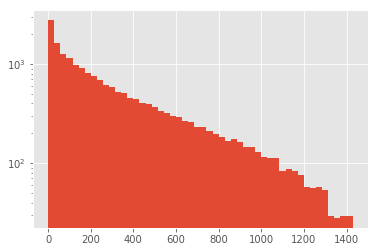

In [64]:
plt.hist(hot_enc_feature.max() - hot_enc_feature, bins=50, log=True);

In [66]:
hot_means = []
names = []
for name in set(data_sample.Hotel_Name):
    names.append(name)
    mask = data_sample.Hotel_Name == name
    hot_means.append(data_sample.Reviewer_Score[mask].mean())

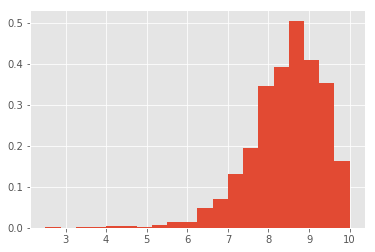

In [67]:
plt.hist(hot_means, bins=20, density=True);

In [69]:
res = []
for mean, name in zip(hot_means, names):
    if mean < 6:
        res.append((name, mean, hot_sp[hot_enc_dict[name]][0]))
pd.DataFrame(res, columns=['Hotel name', 'mean_review', 'count'])

,Hotel name,mean_review,count
0,ABaC Restaurant Hotel Barcelona GL Monumento,2.500000,1
1,Roomz Vienna,5.850000,2
2,Savoy Hotel Amsterdam,5.785714,14
3,HCC St Moritz,5.966667,3
4,Kube Hotel Ice Bar,3.800000,1
5,Best Western Plus 61 Paris Nation Hotel,5.833333,3
6,Mercure Milano Regency,5.800000,1
7,Villa Eugenie,4.400000,2
8,Mercure Paris Gobelins Place d Italie,4.350000,2
9,Hotel La Spezia Gruppo MiniHotel,3.300000,1


In [73]:
res = []
for mean, name in zip(hot_means, names):
    if mean > 9.9:
        res.append((name, mean, hot_sp[hot_enc_dict[name]][0]))
pd.DataFrame(res, columns=['Hotel name', 'mean_review', 'count'])

,Hotel name,mean_review,count
0,Le Littr,10.000000,1
1,Taj 51 Buckingham Gate Suites and Residences,10.000000,5
2,Bulgari Hotel London,10.000000,1
3,H tel Champs lys es Plaza,10.000000,2
4,Sansi Pedralbes,10.000000,1
5,Snob Hotel by Elegancia,10.000000,1
6,Hotel Sacher Wien,10.000000,1
7,The Pillar Hotel,10.000000,1
8,Le 123 Elysees Astotel,10.000000,1
9,Melia Barcelona Sky 4 Sup,10.000000,1


# Feature encoding

In [92]:
data_sample.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [107]:
X = data_sample[[
    'Additional_Number_of_Scoring',
    'Average_Score',
    'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews',
    'Review_Total_Positive_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given',
    'days_since_review',
]]

In [132]:
feature_names = [
    'Additional_Number_of_Scoring',
    'Average_Score',
    'Review_Total_Negative_Word_Counts',
    'Total_Number_of_Reviews',
    'Review_Total_Positive_Word_Counts',
    'Total_Number_of_Reviews_Reviewer_Has_Given',
    'days_since_review',
]

In [108]:
X = X.values.tolist()

In [109]:
for i in range(len(X)):
    X[i][-1] = int(X[i][-1].split()[0])

In [110]:
X[:2]

[[431, 8.7, 2, 1374, 17, 4, 452], [415, 8.4, 4, 3340, 8, 1, 3]]

In [111]:
X = np.array(X)

In [113]:
Y = data_sample.Reviewer_Score.values

In [114]:
Y

array([10. ,  7.5,  4.2, ...,  8.8, 10. ,  9.6])

# Predicting rewiewers score value

In [119]:
params = {'alpha': 0,
  'colsample_bytree': 0.6,
  'eta': 0.05,
  'learning_rate': 0.017,
  'max_delta_step': 5,
  'max_depth': 2,
  'min_child_samples': 100,
  'min_child_weight': 5,
  'n_estimators': 200,
  'num_leaves': 44,
  'scale_pos_weight': 1
}

In [120]:
from xgboost import XGBRegressor

In [122]:
cls = XGBRegressor(n_jobs=8, random_state=0, **params)

In [123]:
cls.fit(X, Y)

[12:12:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, eta=0.05, gamma=0,
       importance_type='gain', learning_rate=0.017, max_delta_step=5,
       max_depth=2, min_child_samples=100, min_child_weight=5,
       missing=None, n_estimators=200, n_jobs=8, nthread=None,
       num_leaves=44, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [125]:
feature_importances = cls.feature_importances_

In [127]:
predictions = cls.predict(X)

In [128]:
rmse = ((Y - predictions) ** 2).mean()

In [129]:
rmse

1.7758650254257478

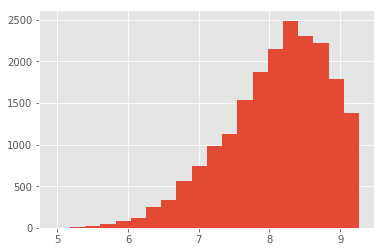

In [131]:
plt.hist(predictions, bins=20);

In [133]:
res = []
for name, imp in zip(feature_names, feature_importances):
    res.append((name, imp))

In [135]:
pd.DataFrame(res)

,0,1
0,Additional_Number_of_Scoring,0.030939
1,Average_Score,0.218641
2,Review_Total_Negative_Word_Counts,0.449774
3,Total_Number_of_Reviews,0.007655
4,Review_Total_Positive_Word_Counts,0.288506
5,Total_Number_of_Reviews_Reviewer_Has_Given,0.004485
6,days_since_review,0.000000


# Covariance Matrix

In [136]:
from scipy.stats import spearmanr

In [139]:
import tqdm

In [137]:
corrs = np.zeros((X.shape[1], X.shape[1]))

In [142]:
spearmanr(X[:, 0], X[:, 1]).correlation

-0.11809440737548244

In [143]:
for i in tqdm.tqdm(range(X.shape[1])):
    for j in range(X.shape[1]):
        corrs[i, j] = spearmanr(X[:, i], X[:, j]).correlation

100%|██████████| 7/7 [00:00<00:00, 40.34it/s]


In [159]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Rank correlation for features')

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

Rank correlation for features


<Figure size 1440x1440 with 0 Axes>

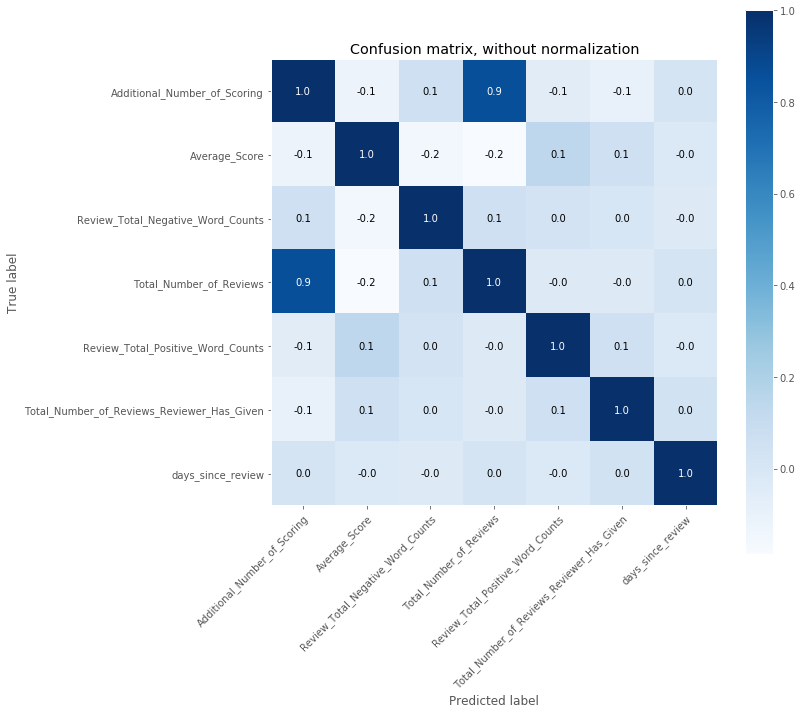

In [160]:
plt.figure(figsize=(20, 20))
plot_confusion_matrix(corrs, classes=feature_names)
plt.grid()
plt.show()